In [1]:
from google.colab import files
uploaded = files.upload()

Saving powerball.xlsx to powerball.xlsx


In [2]:
import pandas as pd

# Replace filename if needed
df = pd.read_excel("powerball.xlsx")

df.head()


,Drawing Date,Winning numbers,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Powerball
0,2026-01-05,4,18,24,51,56,14
1,2026-01-03,18,21,40,53,60,23
2,2025-12-31,11,18,21,24,38,26
3,2025-12-29,11,19,34,48,53,21
4,2025-12-27,5,20,34,39,62,1


In [3]:
# Column indexing starts at 0
white_cols = df.iloc[:, 1:6]   # Columns B–F
powerball_col = df.iloc[:, 6]  # Column G

# Convert to integers
white_cols = white_cols.astype(int)
powerball_col = powerball_col.astype(int)


In [4]:
from collections import Counter

white_numbers = white_cols.values.flatten()
white_counts = Counter(white_numbers)

powerball_counts = Counter(powerball_col)


In [5]:
white_counts.most_common(10), powerball_counts.most_common(10)


([(np.int64(28), 354),
  (np.int64(23), 354),
  (np.int64(32), 354),
  (np.int64(39), 353),
  (np.int64(36), 348),
  (np.int64(16), 348),
  (np.int64(45), 344),
  (np.int64(26), 341),
  (np.int64(27), 341),
  (np.int64(19), 340)],
 [(20, 129),
  (18, 124),
  (14, 121),
  (9, 120),
  (24, 120),
  (1, 118),
  (6, 118),
  (26, 116),
  (2, 116),
  (21, 112)])

In [6]:
total_draws = len(df)

white_prob = {num: count / total_draws for num, count in white_counts.items()}
powerball_prob = {num: count / total_draws for num, count in powerball_counts.items()}


In [34]:
sorted(white_prob.items(), key=lambda x: x[1], reverse=True)[:10]


[(np.int64(28), 0.0946271050521251),
 (np.int64(23), 0.0946271050521251),
 (np.int64(32), 0.0946271050521251),
 (np.int64(39), 0.09435979684576316),
 (np.int64(36), 0.09302325581395349),
 (np.int64(16), 0.09302325581395349),
 (np.int64(45), 0.09195402298850575),
 (np.int64(26), 0.09115209836941994),
 (np.int64(27), 0.09115209836941994),
 (np.int64(19), 0.090884790163058)]

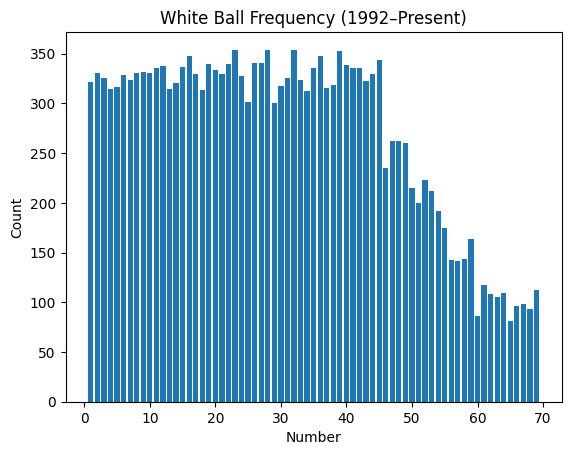

In [8]:
import matplotlib.pyplot as plt

# White ball frequency
nums, counts = zip(*white_counts.most_common())
plt.figure()
plt.bar(nums, counts)
plt.title("White Ball Frequency (1992–Present)")
plt.xlabel("Number")
plt.ylabel("Count")
plt.show()


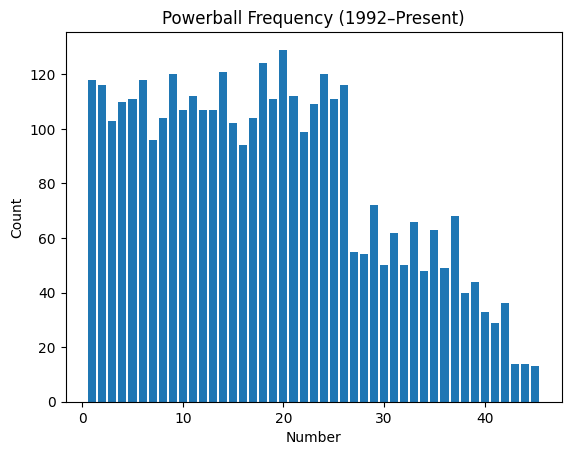

In [9]:
# Powerball frequency
nums_pb, counts_pb = zip(*powerball_counts.most_common())
plt.figure()
plt.bar(nums_pb, counts_pb)
plt.title("Powerball Frequency (1992–Present)")
plt.xlabel("Number")
plt.ylabel("Count")
plt.show()


In [10]:
top_white = [num for num, _ in white_counts.most_common(5)]
top_powerball = powerball_counts.most_common(1)[0][0]

print("Historically Most Common White Balls:", sorted(top_white))
print("Historically Most Common Powerball:", top_powerball)


Historically Most Common White Balls: [np.int64(23), np.int64(28), np.int64(32), np.int64(36), np.int64(39)]
Historically Most Common Powerball: 20


In [11]:
import random

def simulate_draw():
    white = random.sample(range(1, 70), 5)
    powerball = random.randint(1, 26)
    return white, powerball


In [12]:
sim_white = []
sim_pb = []

for _ in range(100000):
    w, p = simulate_draw()
    sim_white.extend(w)
    sim_pb.append(p)

from collections import Counter
sim_white_counts = Counter(sim_white)
sim_pb_counts = Counter(sim_pb)


In [24]:
print("=== Historical Top White Balls ===")
print(white_counts.most_common(5))

print("\n=== Simulated Top White Balls ===")
print(sim_white_counts.most_common(5))

print("\n=== Historical Powerball ===")
print(powerball_counts.most_common(1))

print("\n=== Simulated Powerball ===")
print(sim_pb_counts.most_common(1))


=== Historical Top White Balls ===
[(28, 354), (23, 354), (32, 354), (39, 353), (36, 348)]

=== Simulated Top White Balls ===
[(32, 7401), (40, 7401), (6, 7399), (8, 7385), (2, 7383)]

=== Historical Powerball ===
[(20, 129)]

=== Simulated Powerball ===
[(6, 3983)]


In [15]:
total_historical_white = len(df) * 5

hist_white_prob = {
    num: count / total_historical_white
    for num, count in white_counts.items()
}



In [16]:
total_sim_white = len(sim_white)

sim_white_prob = {
    num: count / total_sim_white
    for num, count in sim_white_counts.items()
}


In [17]:
print("=== Historical White Ball Probabilities ===")
for num, prob in sorted(hist_white_prob.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Number {num}: {prob:.4%}")

print("\n=== Simulated White Ball Probabilities ===")
for num, prob in sorted(sim_white_prob.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Number {num}: {prob:.4%}")


=== Historical White Ball Probabilities ===
Number 28: 1.8925%
Number 23: 1.8925%
Number 32: 1.8925%
Number 39: 1.8872%
Number 36: 1.8605%

=== Simulated White Ball Probabilities ===
Number 32: 1.4802%
Number 40: 1.4802%
Number 6: 1.4798%
Number 8: 1.4770%
Number 2: 1.4766%


In [25]:
from collections import Counter

# Flatten columns B–F
white_numbers = df.iloc[:, 1:6].values.flatten()

# Force Python ints (clean output)
white_numbers = [int(n) for n in white_numbers]

white_counts = Counter(white_numbers)


In [26]:
total_white_draws = len(df) * 5

summary_df = (
    pd.DataFrame(white_counts.items(), columns=["Number", "Count"])
    .sort_values(by="Count", ascending=False)
    .reset_index(drop=True)
)

summary_df["Probability (%)"] = (
    summary_df["Count"] / total_white_draws * 100
).round(3)

summary_df.head(10)


,Number,Count,Probability (%)
0,23,354,1.893
1,28,354,1.893
2,32,354,1.893
3,39,353,1.887
4,16,348,1.860
5,36,348,1.860
6,45,344,1.839
7,27,341,1.823
8,26,341,1.823
9,22,340,1.818


In [32]:
print("=== Most Repeated White Balls (Columns B–F) ===")
for _, row in summary_df.head(10).iterrows():
    print(
        f"Number {int(row['Number'])}: "
        f"{int(row['Count'])} times "
        f"({row['Probability (%)']}%)"
    )



=== Most Repeated White Balls (Columns B–F) ===
Number 23: 354 times (1.893%)
Number 28: 354 times (1.893%)
Number 32: 354 times (1.893%)
Number 39: 353 times (1.887%)
Number 16: 348 times (1.86%)
Number 36: 348 times (1.86%)
Number 45: 344 times (1.839%)
Number 27: 341 times (1.823%)
Number 26: 341 times (1.823%)
Number 22: 340 times (1.818%)
